# Loading Basic Libraries

In [2]:
import pandas as pd
import numpy as np

### Loading the Data

In [3]:
train = pd.read_csv("train_dataset.csv")
test = pd.read_csv("test_dataset.csv")

### Sorting By Date
- A standard procediment is to orginize this type of data by Date
- Having the information sorted by Date and setting that info into a DateTimeIndex will allow us to use some special features that will help us at the time of tracking the evolution of sales per time

In [4]:
train['Date'] = pd.to_datetime(train['Date'],format="%d/%m/%Y")
train = train.sort_values(by='Date')
train = train.reset_index(drop=True)
train= train.set_index("Date")

In [5]:
train.head(2)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price
Date,,,,,,,
2012-12-01,P-8705,B-3078,kitchen dining,coffee mugs,prithish coffee mugs,5.0,293.0
2012-12-01,P-3704,B-947,jewellery,necklaces chains,necklaces,5.0,470.0


#### Getting more info from the Dataset

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2084 entries, 2012-12-01 to 2020-06-26
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product        2084 non-null   object 
 1   Product_Brand  2084 non-null   object 
 2   Item_Category  2084 non-null   object 
 3   Subcategory_1  2084 non-null   object 
 4   Subcategory_2  2084 non-null   object 
 5   Item_Rating    2084 non-null   float64
 6   Selling_Price  2084 non-null   float64
dtypes: float64(2), object(5)
memory usage: 130.2+ KB


In [7]:
print(train.nunique())

Product          2084
Product_Brand     879
Item_Category      67
Subcategory_1     128
Subcategory_2     312
Item_Rating        41
Selling_Price     988
dtype: int64


### Exploring different technics to get better insights

In [8]:
train.Product_Brand.value_counts().head(10)

Product_Brand
B-3078    588
B-133      76
B-2679     37
B-2372     34
B-1517     30
B-2307     28
B-2741     24
B-405      17
B-3231     15
B-2355     14
Name: count, dtype: int64

### Plotting the Data to get a better understanding

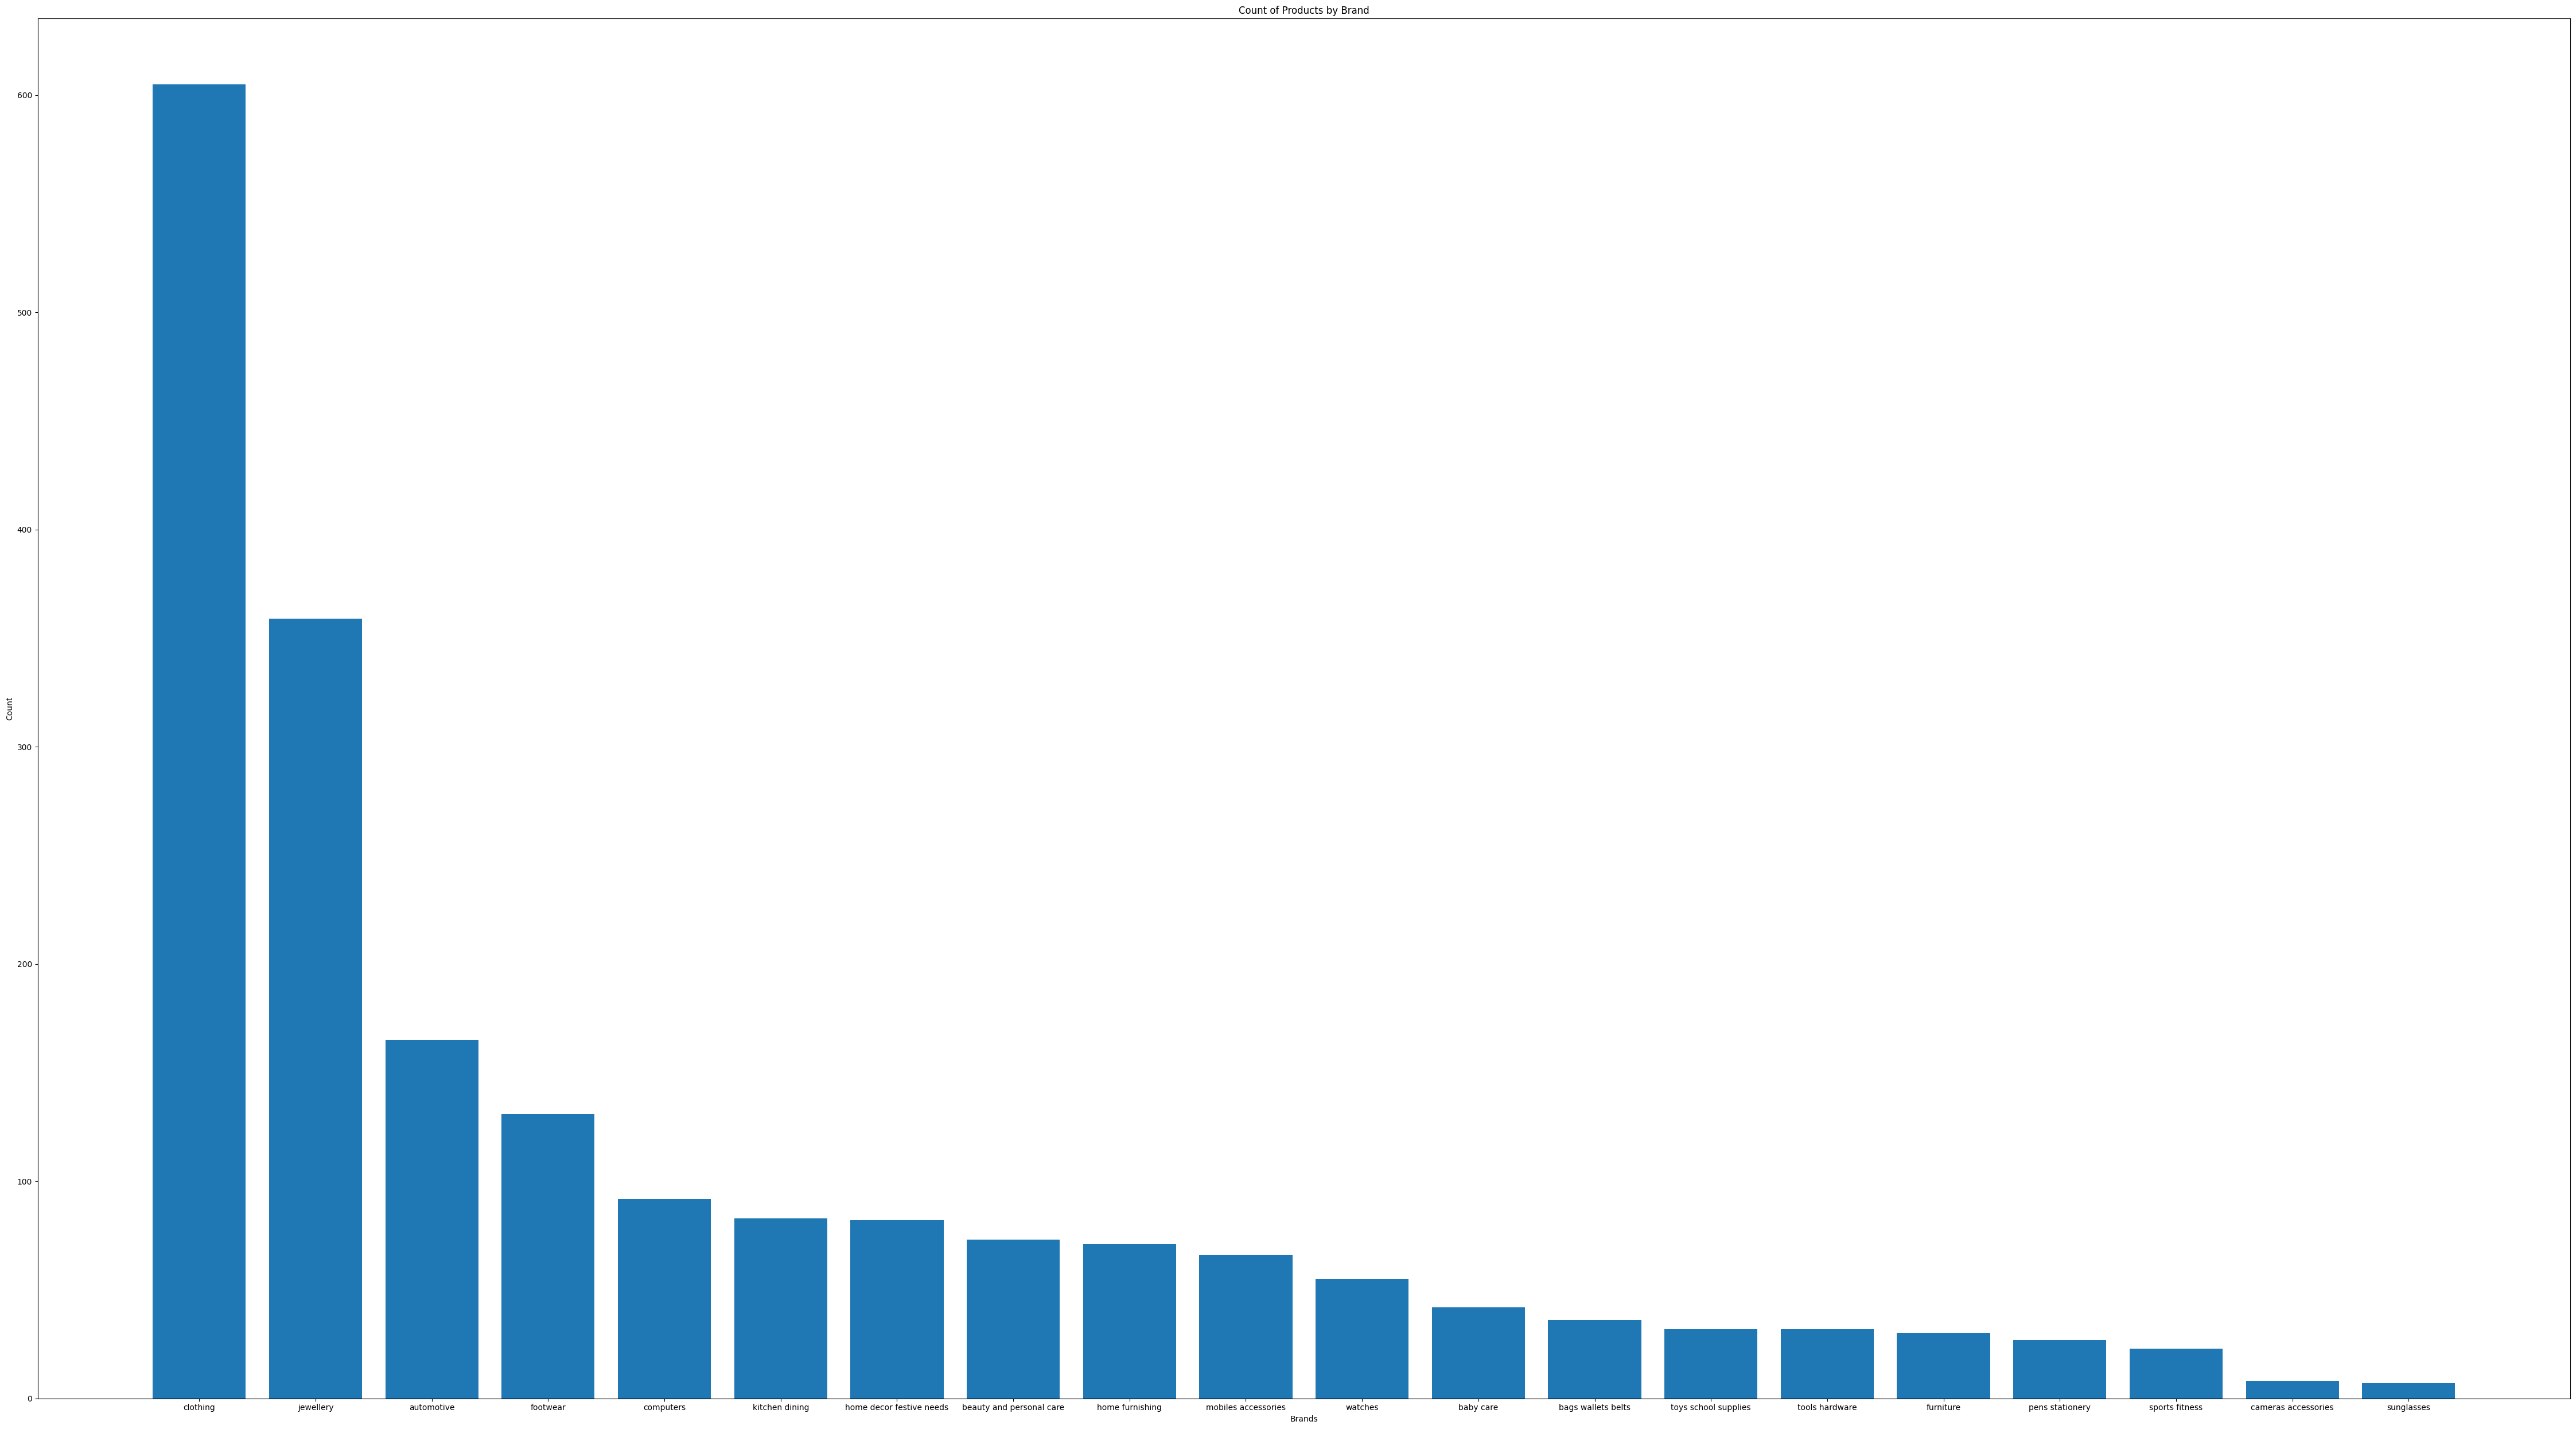

In [9]:
import matplotlib.pyplot as plt
brand_counts = train["Item_Category"].value_counts().head(20)
plt.figure(figsize=(45, 25)) 
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Count of Products by Brand')
plt.tight_layout()
plt.show()


In [10]:
train["Item_Category"].value_counts().head(10)

Item_Category
clothing                    605
jewellery                   359
automotive                  165
footwear                    131
computers                    92
kitchen dining               83
home decor festive needs     82
beauty and personal care     73
home furnishing              71
mobiles accessories          66
Name: count, dtype: int64

- We have seen how Clothing and Jewelry represents the top 2 best sellers, let`s dig into that

In [11]:
train.Product.nunique()#Not really helpfull

2084

In [12]:
train.Product.value_counts()

Product
P-8705     1
P-10606    1
P-5622     1
P-9686     1
P-2455     1
          ..
P-12406    1
P-12503    1
P-11051    1
P-6881     1
P-11820    1
Name: count, Length: 2084, dtype: int64

### Looking for the type of products that has the highest amount of sales

In [13]:
train["Subcategory_1"].value_counts().head(10)

Subcategory_1
women s clothing             402
accessories spare parts      151
men s clothing               148
necklaces chains             132
rings                        115
women s footwear              83
bangles bracelets armlets     65
kids clothing                 55
wrist watches                 54
laptop accessories            48
Name: count, dtype: int64

- In Subcategory, we are looking at a clear top selling products
- Let´s see how much they have made so far

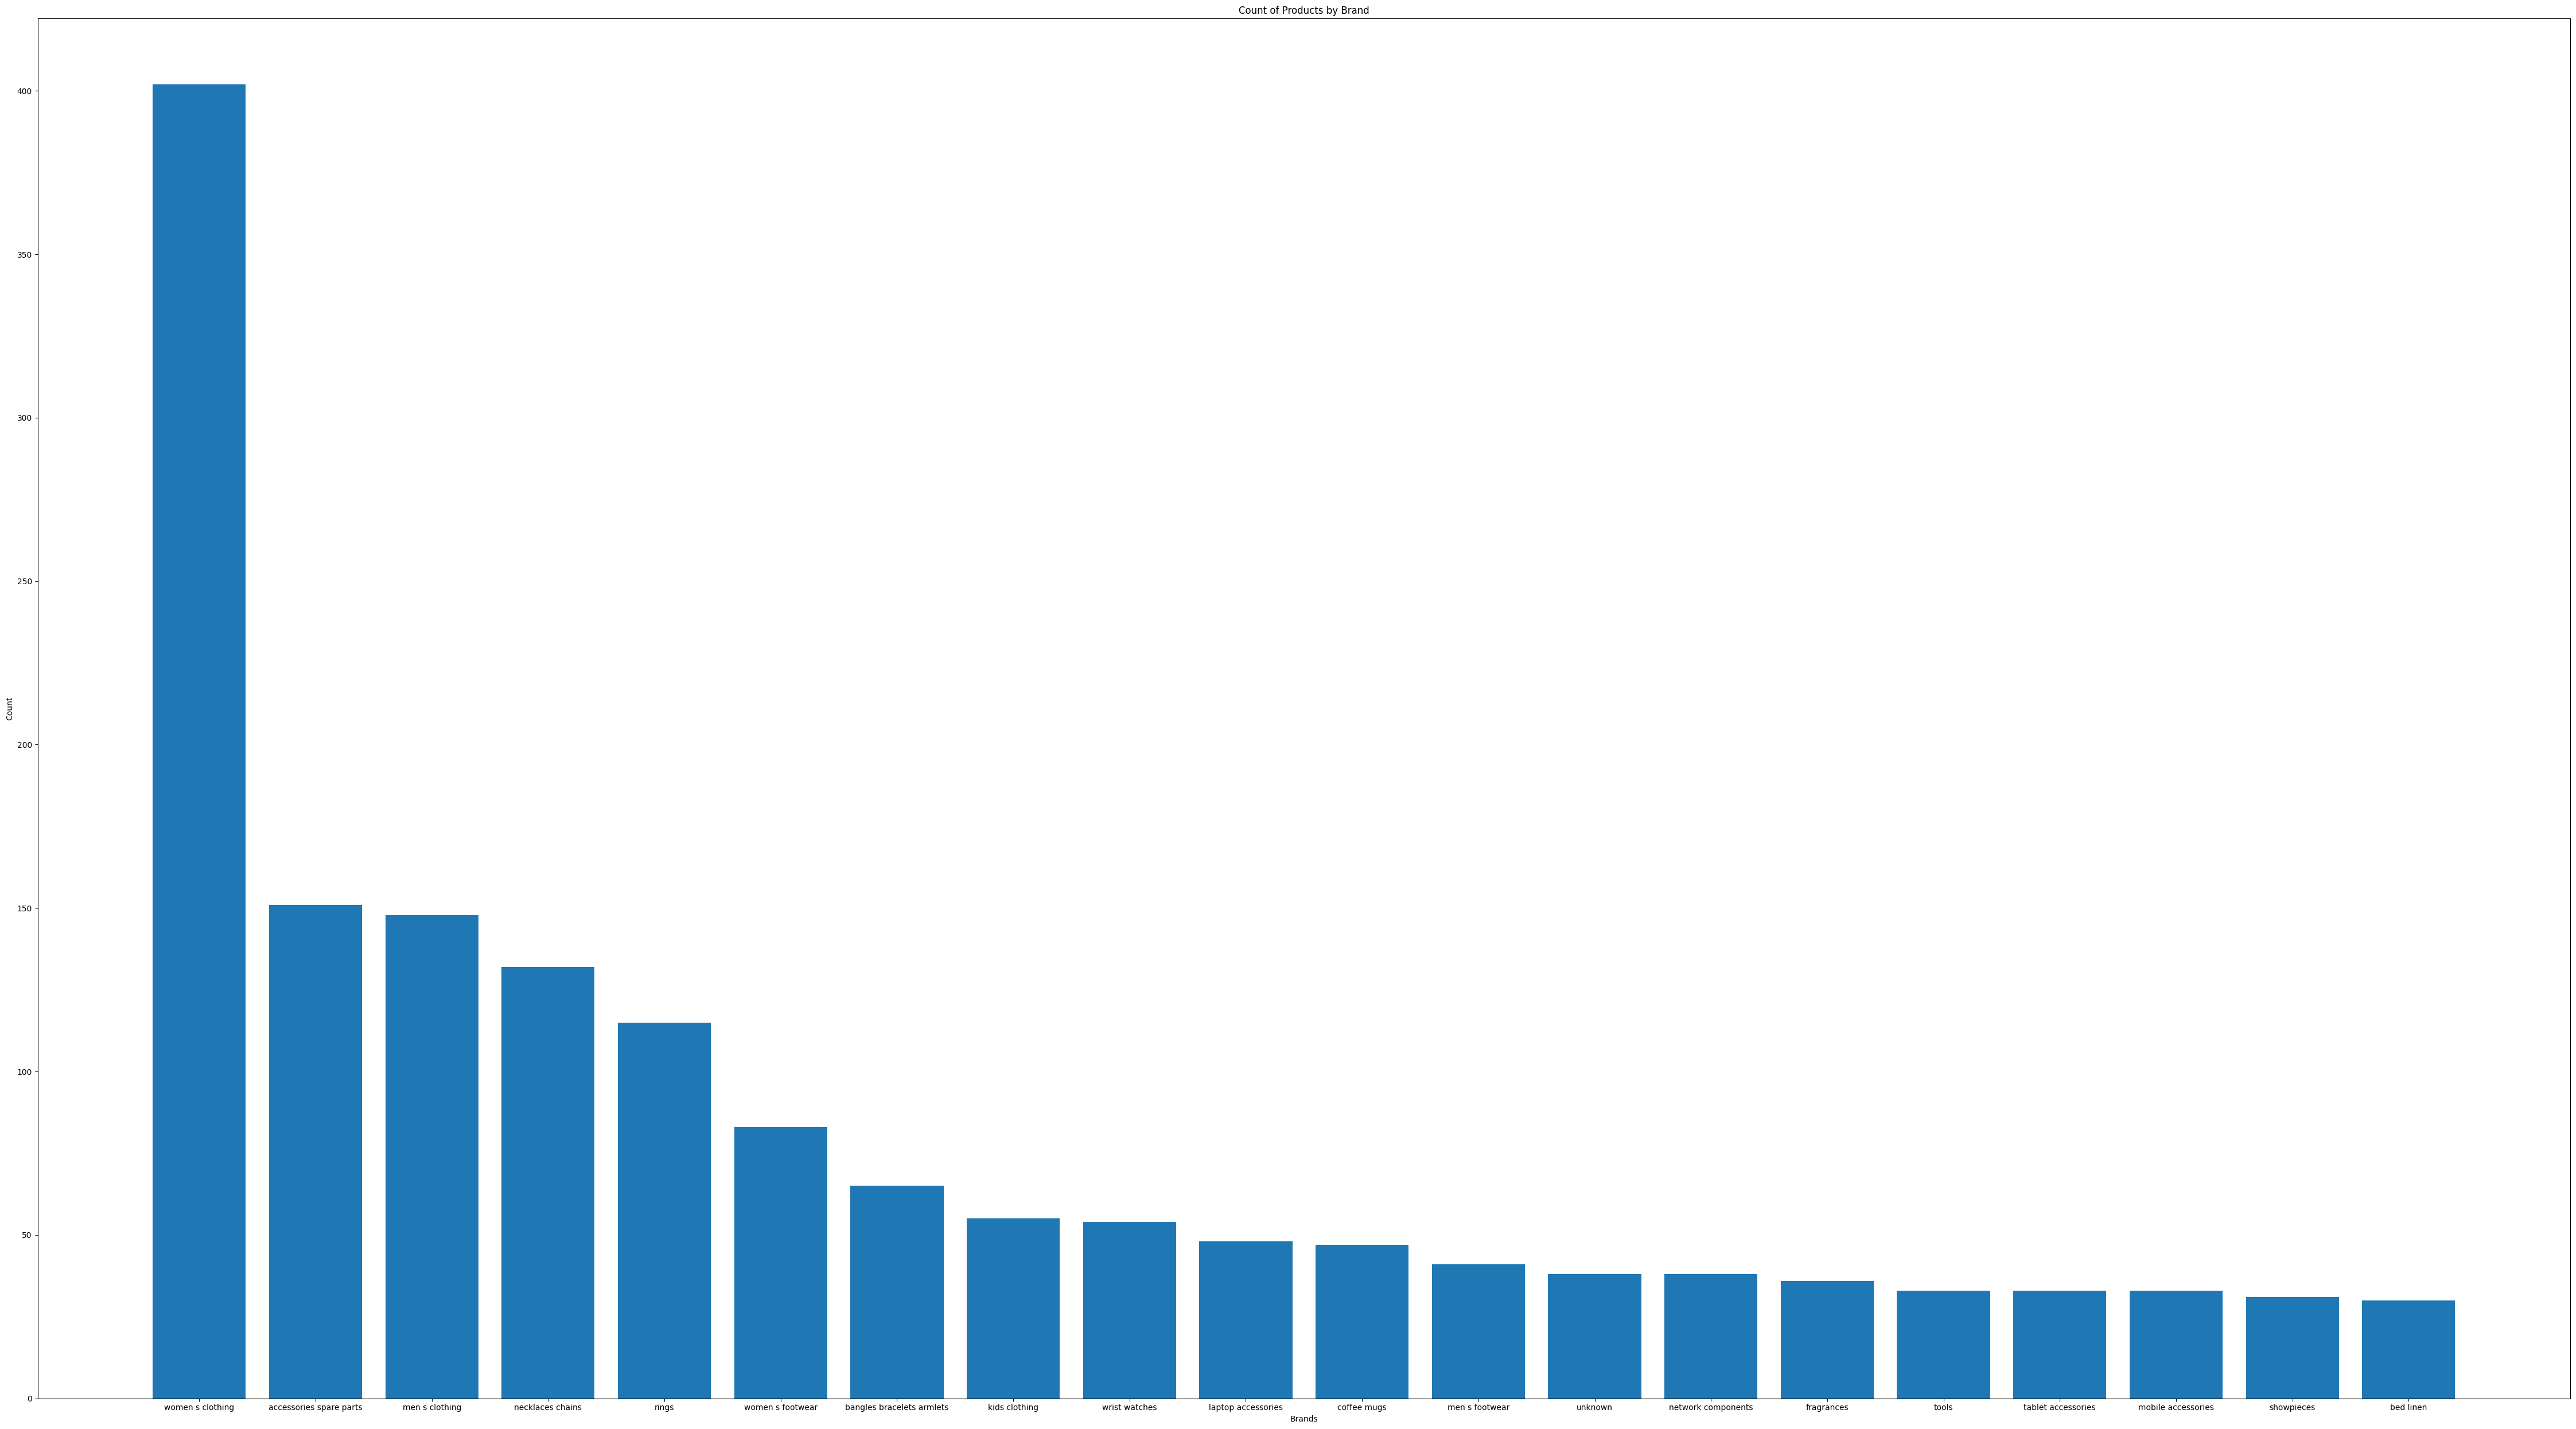

In [14]:
import matplotlib.pyplot as plt
brand_counts = train["Subcategory_1"].value_counts().head(20)
plt.figure(figsize=(45, 25)) 
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Brands')
plt.ylabel('Count')
plt.title('Count of Products by Brand')
plt.tight_layout()
plt.show()


In [15]:
top_10 = train["Subcategory_1"].value_counts().head(10).index


In [16]:
top_10#this is the list of the top 10 best sellers

Index(['women s clothing', 'accessories spare parts', 'men s clothing',
       'necklaces chains', 'rings', 'women s footwear',
       'bangles bracelets armlets', 'kids clothing', 'wrist watches',
       'laptop accessories'],
      dtype='object', name='Subcategory_1')

In [17]:
filtered_train = train[train["Subcategory_1"].isin(top_10)]#we are filtering the dataset to only get a dataset with the top 10 products


In [18]:
subcategory = filtered_train.groupby("Item_Category")["Selling_Price"].sum().reset_index().sort_values(by="Selling_Price", ascending=False)


In [19]:
subcategory.head(10)#this is what jewellery and clothing has bring to the table so far

,Item_Category,Selling_Price
4,jewellery,2943653.0
1,clothing,428675.0
0,automotive,173952.0
3,footwear,78348.0
5,watches,47357.0
2,computers,38653.0


# Digging into Sub-category

In [20]:
subcategory_income = filtered_train.groupby("Subcategory_1")["Selling_Price"].sum().reset_index()


In [21]:
subcategory_income.sort_values(by="Selling_Price", ascending=False)

,Subcategory_1,Selling_Price
6,rings,2823979.0
7,women s clothing,256036.0
0,accessories spare parts,173952.0
4,men s clothing,129143.0
8,women s footwear,78348.0
1,bangles bracelets armlets,65602.0
5,necklaces chains,54072.0
9,wrist watches,47357.0
2,kids clothing,43496.0
3,laptop accessories,38653.0


- So far we have stablish that Clothing (specially women´s clothing) has a higher amount of sales but rings, brings the highest income

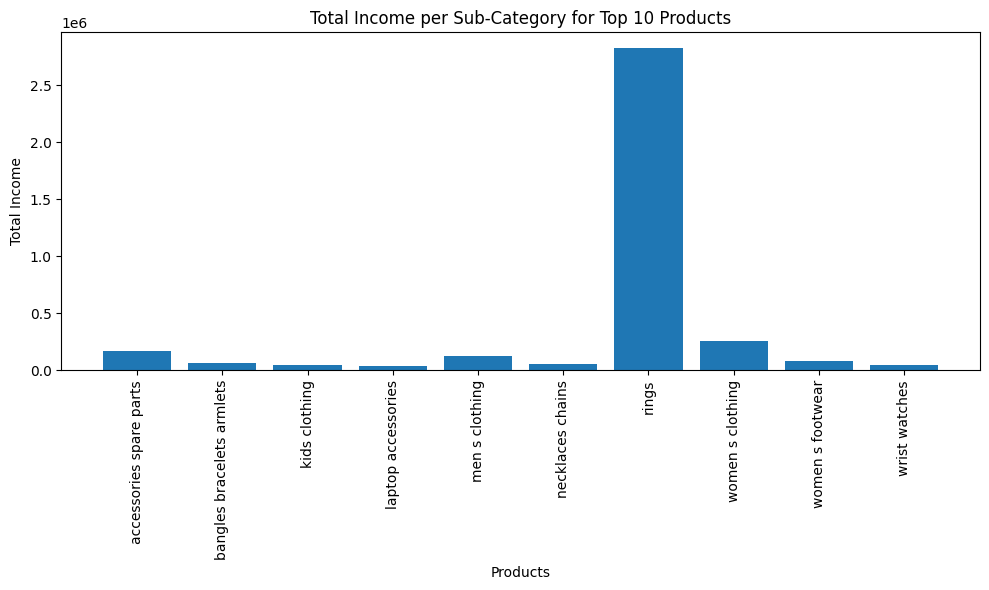

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(subcategory_income["Subcategory_1"], subcategory_income["Selling_Price"])

plt.xlabel('Products')
plt.ylabel('Total Income')
plt.title('Total Income per Sub-Category for Top 10 Products')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### The opposite
- Now, let´s invert the situation to see whats at the bottom of the list (low performers)

In [23]:
tail_10 = train["Subcategory_1"].value_counts().tail(10).index
filtered_train_2 = train[train["Subcategory_1"].isin(tail_10)]
subcategory_2 = filtered_train_2.groupby("Item_Category")["Selling_Price"].sum().reset_index().sort_values(by="Selling_Price", ascending=False)


In [24]:
subcategory_2

,Item_Category,Selling_Price
0,baby care,9367.0
1,ebooks,3752.0
5,kitchen dining,1289.0
4,jewellery,626.0
3,home entertainment,529.0
2,home decor festive needs,505.0
6,sunglasses,288.0
7,watches,143.0


In [25]:
subcategory_income_2 = filtered_train_2.groupby("Subcategory_1")["Selling_Price"].sum().reset_index()
subcategory_income_2.sort_values(by="Selling_Price", ascending=False)

,Subcategory_1,Selling_Price
7,strollers activity gear,9367.0
6,science,3752.0
2,housekeeping laundry,1289.0
1,flowers plants vases,505.0
5,precious jewellery,327.0
3,mangalsutras tanmaniyas,299.0
4,mp3 players ipods accessories,291.0
0,eye glass wayfarer sunglasses,288.0
8,video players accessories,238.0
9,watch accessories,143.0


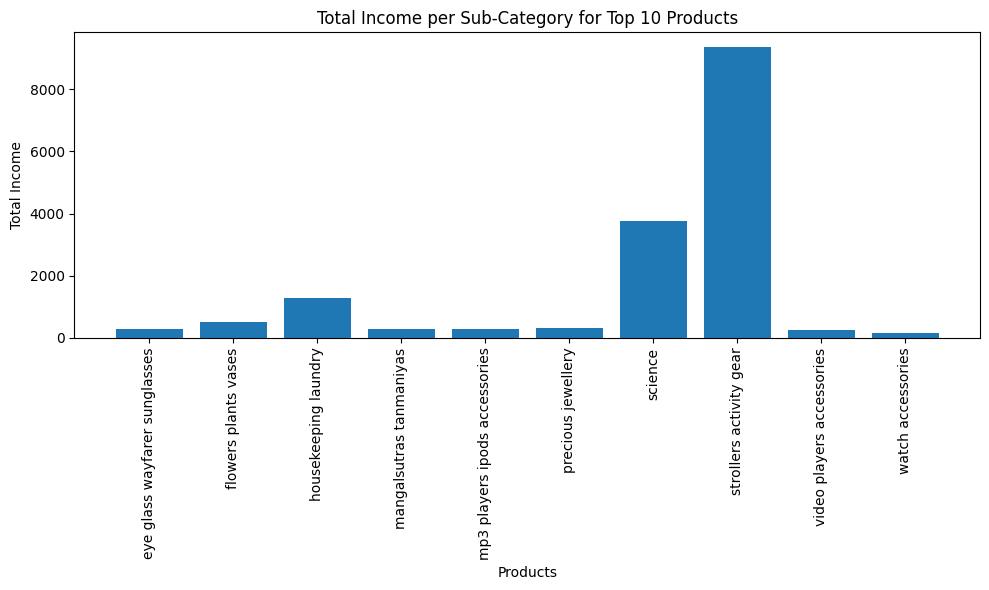

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(subcategory_income_2["Subcategory_1"], subcategory_income_2["Selling_Price"])

plt.xlabel('Products')
plt.ylabel('Total Income')
plt.title('Total Income per Sub-Category for Top 10 Products')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [27]:
train.head(2)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price
Date,,,,,,,
2012-12-01,P-8705,B-3078,kitchen dining,coffee mugs,prithish coffee mugs,5.0,293.0
2012-12-01,P-3704,B-947,jewellery,necklaces chains,necklaces,5.0,470.0


# Finishing EDA
- Let´s see what is the most liked product in our Dataset

In [28]:
liked_products = train.groupby("Subcategory_1")["Item_Rating"].count().reset_index()
liked_products.sort_values(by="Item_Rating", ascending=False)


,Subcategory_1,Item_Rating
125,women s clothing,402
2,accessories spare parts,151
79,men s clothing,148
85,necklaces chains,132
105,rings,115
...,...,...
93,party supplies,1
33,diapering potty training,1
96,personal care appliances,1
97,pet apparel,1


In [29]:
liked_products_2 = train.groupby("Subcategory_1")["Item_Rating"].count().reset_index()


In [30]:
liked_products_2

,Subcategory_1,Item_Rating
0,academic texts,4
1,accessories,17
2,accessories spare parts,151
3,action figures,6
4,art supplies,1
...,...,...
123,wallets clutches,4
124,watch accessories,1
125,women s clothing,402
126,women s footwear,83


In [31]:
train.head(2)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price
Date,,,,,,,
2012-12-01,P-8705,B-3078,kitchen dining,coffee mugs,prithish coffee mugs,5.0,293.0
2012-12-01,P-3704,B-947,jewellery,necklaces chains,necklaces,5.0,470.0


In [32]:
liked_products_3 = train.groupby("Subcategory_1")["Item_Rating"].count().reset_index()
liked_products_3.sort_values(by="Item_Rating", ascending=False)

,Subcategory_1,Item_Rating
125,women s clothing,402
2,accessories spare parts,151
79,men s clothing,148
85,necklaces chains,132
105,rings,115
...,...,...
93,party supplies,1
33,diapering potty training,1
96,personal care appliances,1
97,pet apparel,1


In [33]:
df_cleaned= train.loc[train["Subcategory_1"] == "women s clothing"]


In [34]:
df_cleaned.sort_values("Item_Rating",ascending=False).head(50)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price
Date,,,,,,,
2017-01-07,P-6201,B-334,clothing,women s clothing,lingerie sleep swimwear,5.0,519.0
2013-12-30,P-2718,B-2372,clothing,women s clothing,western wear,5.0,380.0
2015-01-07,P-11551,B-2355,clothing,women s clothing,lingerie sleep swimwear,5.0,263.0
2015-01-07,P-6667,B-2281,clothing,women s clothing,lingerie sleep swimwear,5.0,296.0
2013-01-07,P-8519,B-2201,clothing,women s clothing,lingerie sleep swimwear,5.0,802.0
2015-01-07,P-12187,B-378,clothing,women s clothing,lingerie sleep swimwear,5.0,319.0
2014-01-07,P-11086,B-2201,clothing,women s clothing,lingerie sleep swimwear,5.0,268.0
2019-12-01,P-8163,B-3078,clothing,women s clothing,western wear,5.0,828.0
2017-01-07,P-8851,B-334,clothing,women s clothing,lingerie sleep swimwear,5.0,124.0


# Let´s make the model
- We are going to begin with time series in different ways

In [35]:
train.head(2)

,Product,Product_Brand,Item_Category,Subcategory_1,Subcategory_2,Item_Rating,Selling_Price
Date,,,,,,,
2012-12-01,P-8705,B-3078,kitchen dining,coffee mugs,prithish coffee mugs,5.0,293.0
2012-12-01,P-3704,B-947,jewellery,necklaces chains,necklaces,5.0,470.0


In [36]:
time_series_1= train.drop(columns={"Product","Product_Brand","Item_Category","Subcategory_1","Subcategory_2","Item_Rating"})

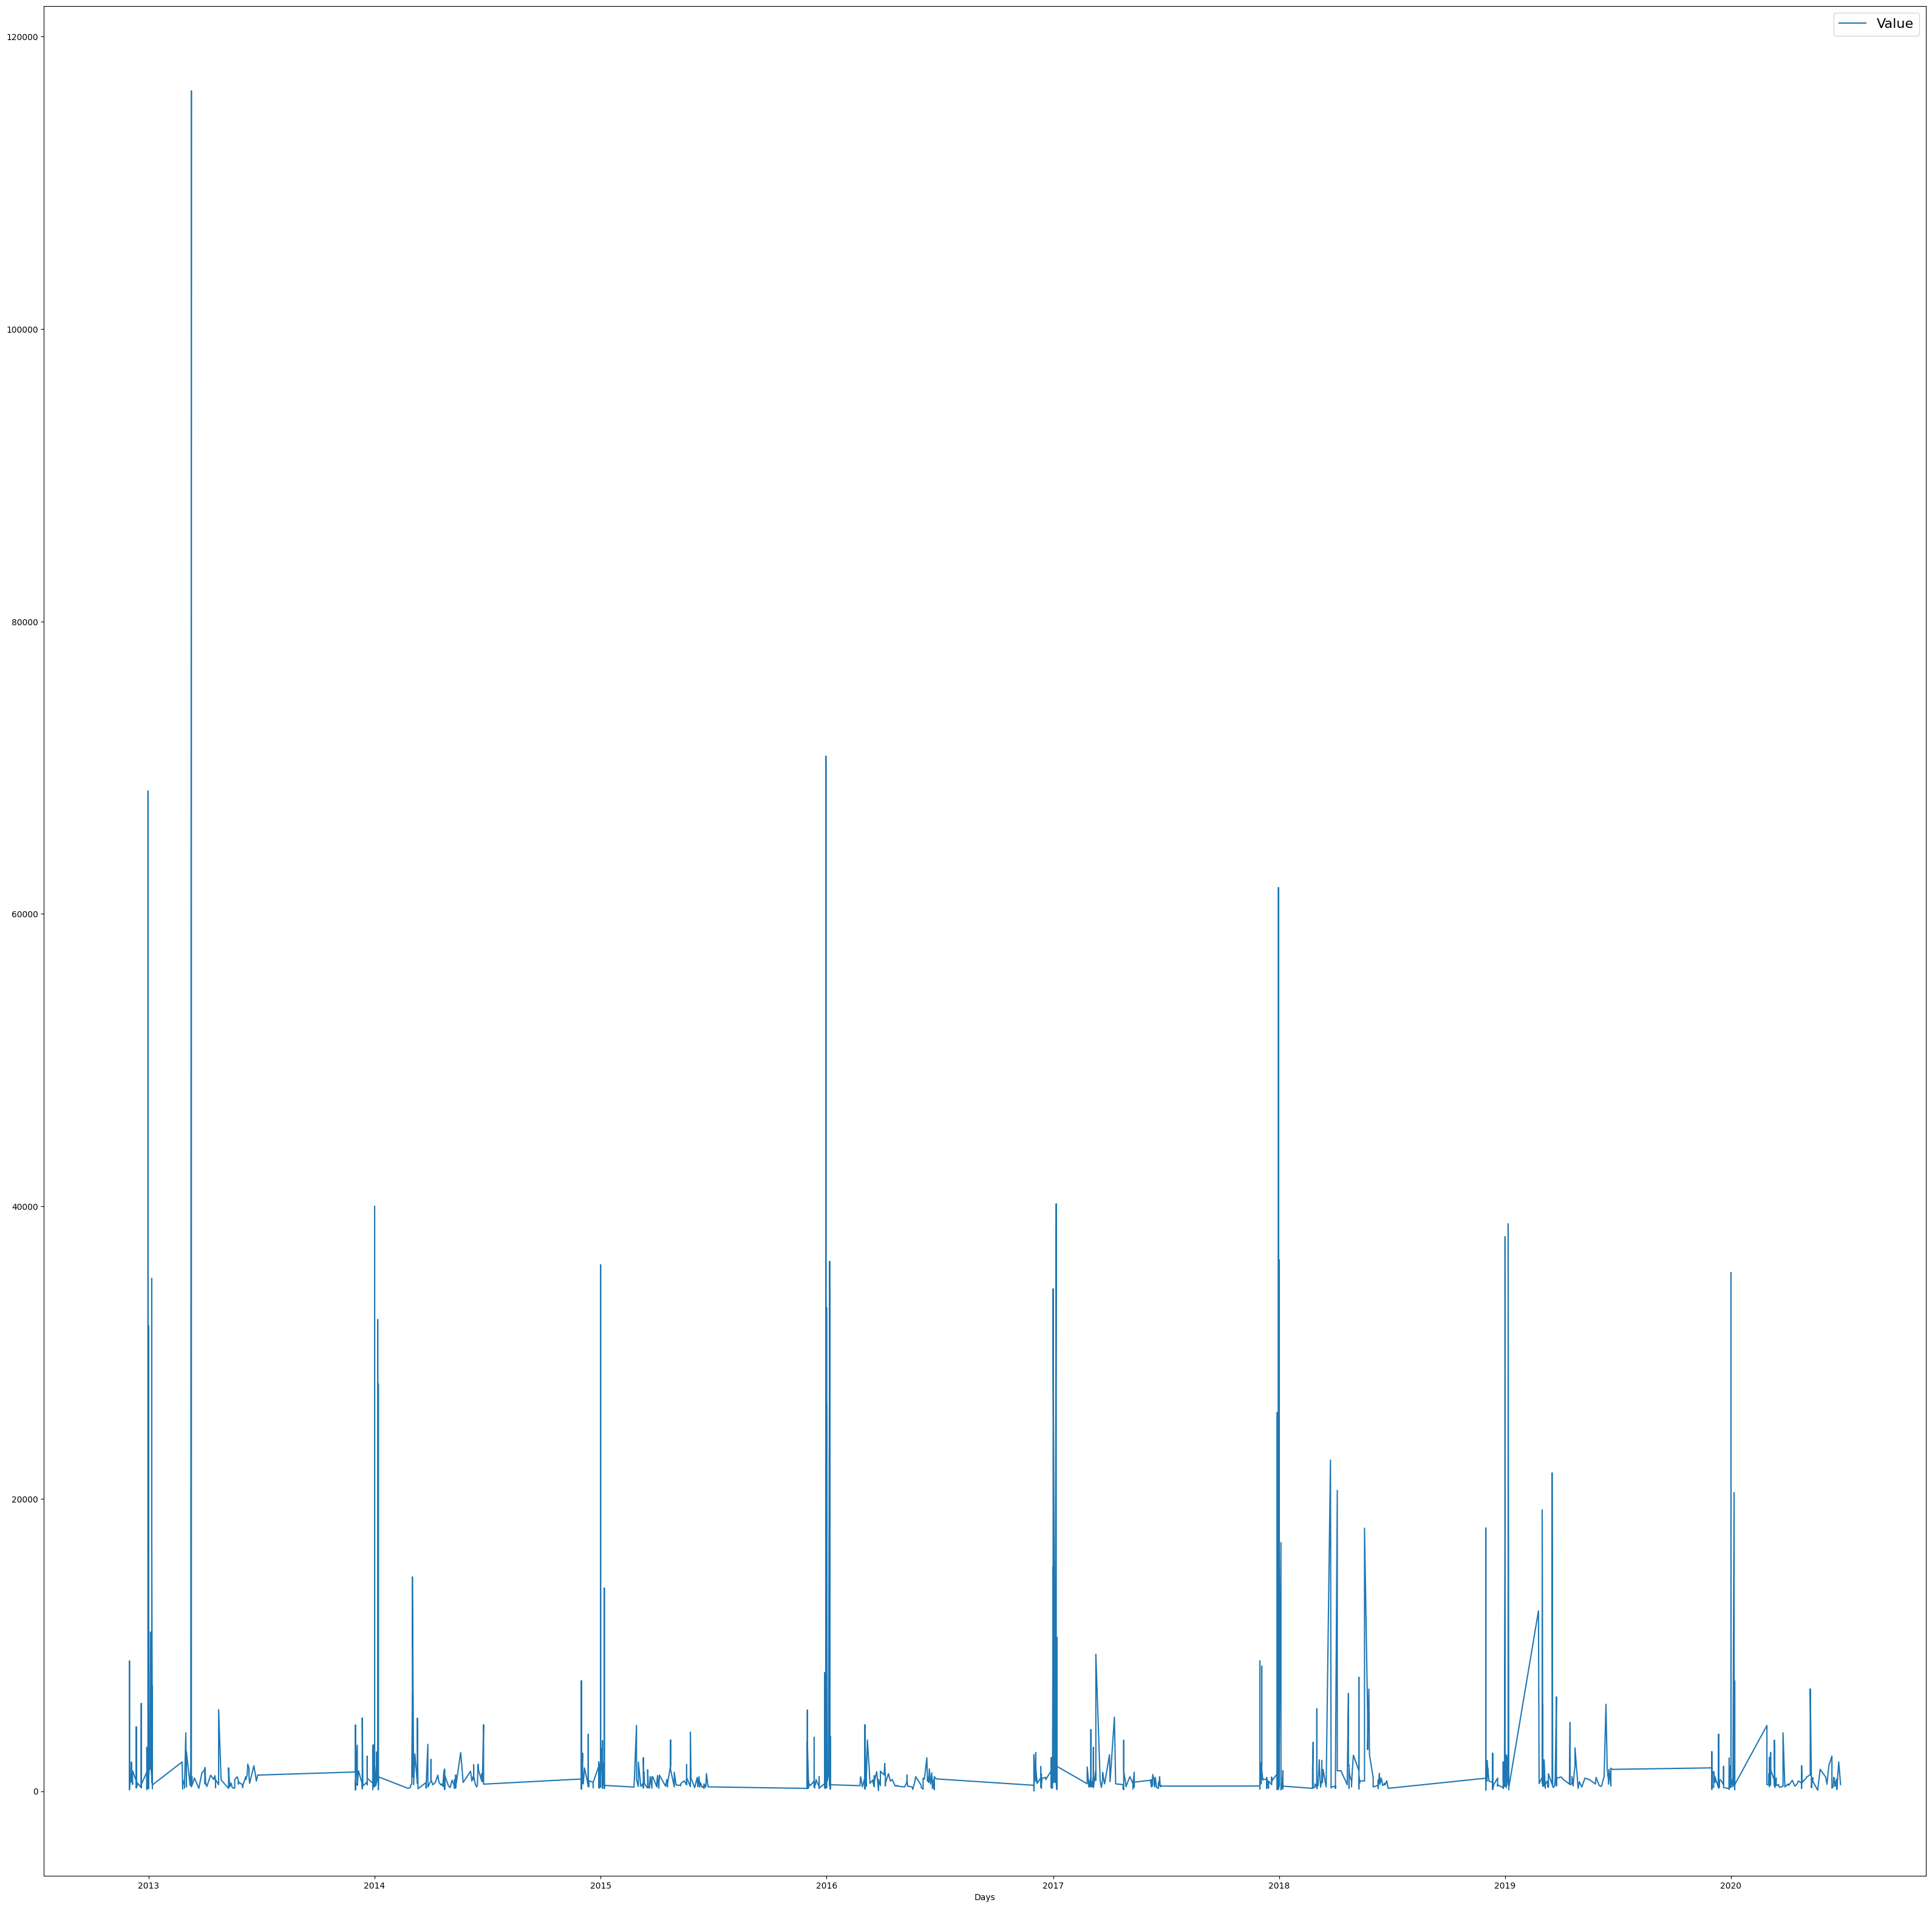

In [37]:
plt.rcParams["figure.figsize"] = (40, 40)

plt.plot(time_series_1["Selling_Price"], label="Value")
plt.xlabel('Days')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

- Taking the group with the highest sale

In [38]:
time_series_2= train[train["Subcategory_1"]=="rings"]
time_series_2= time_series_2.drop(columns={"Product","Product_Brand","Item_Category","Subcategory_1","Subcategory_2","Item_Rating"})

In [39]:
time_series_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2013-01-01 to 2020-01-06
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  115 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


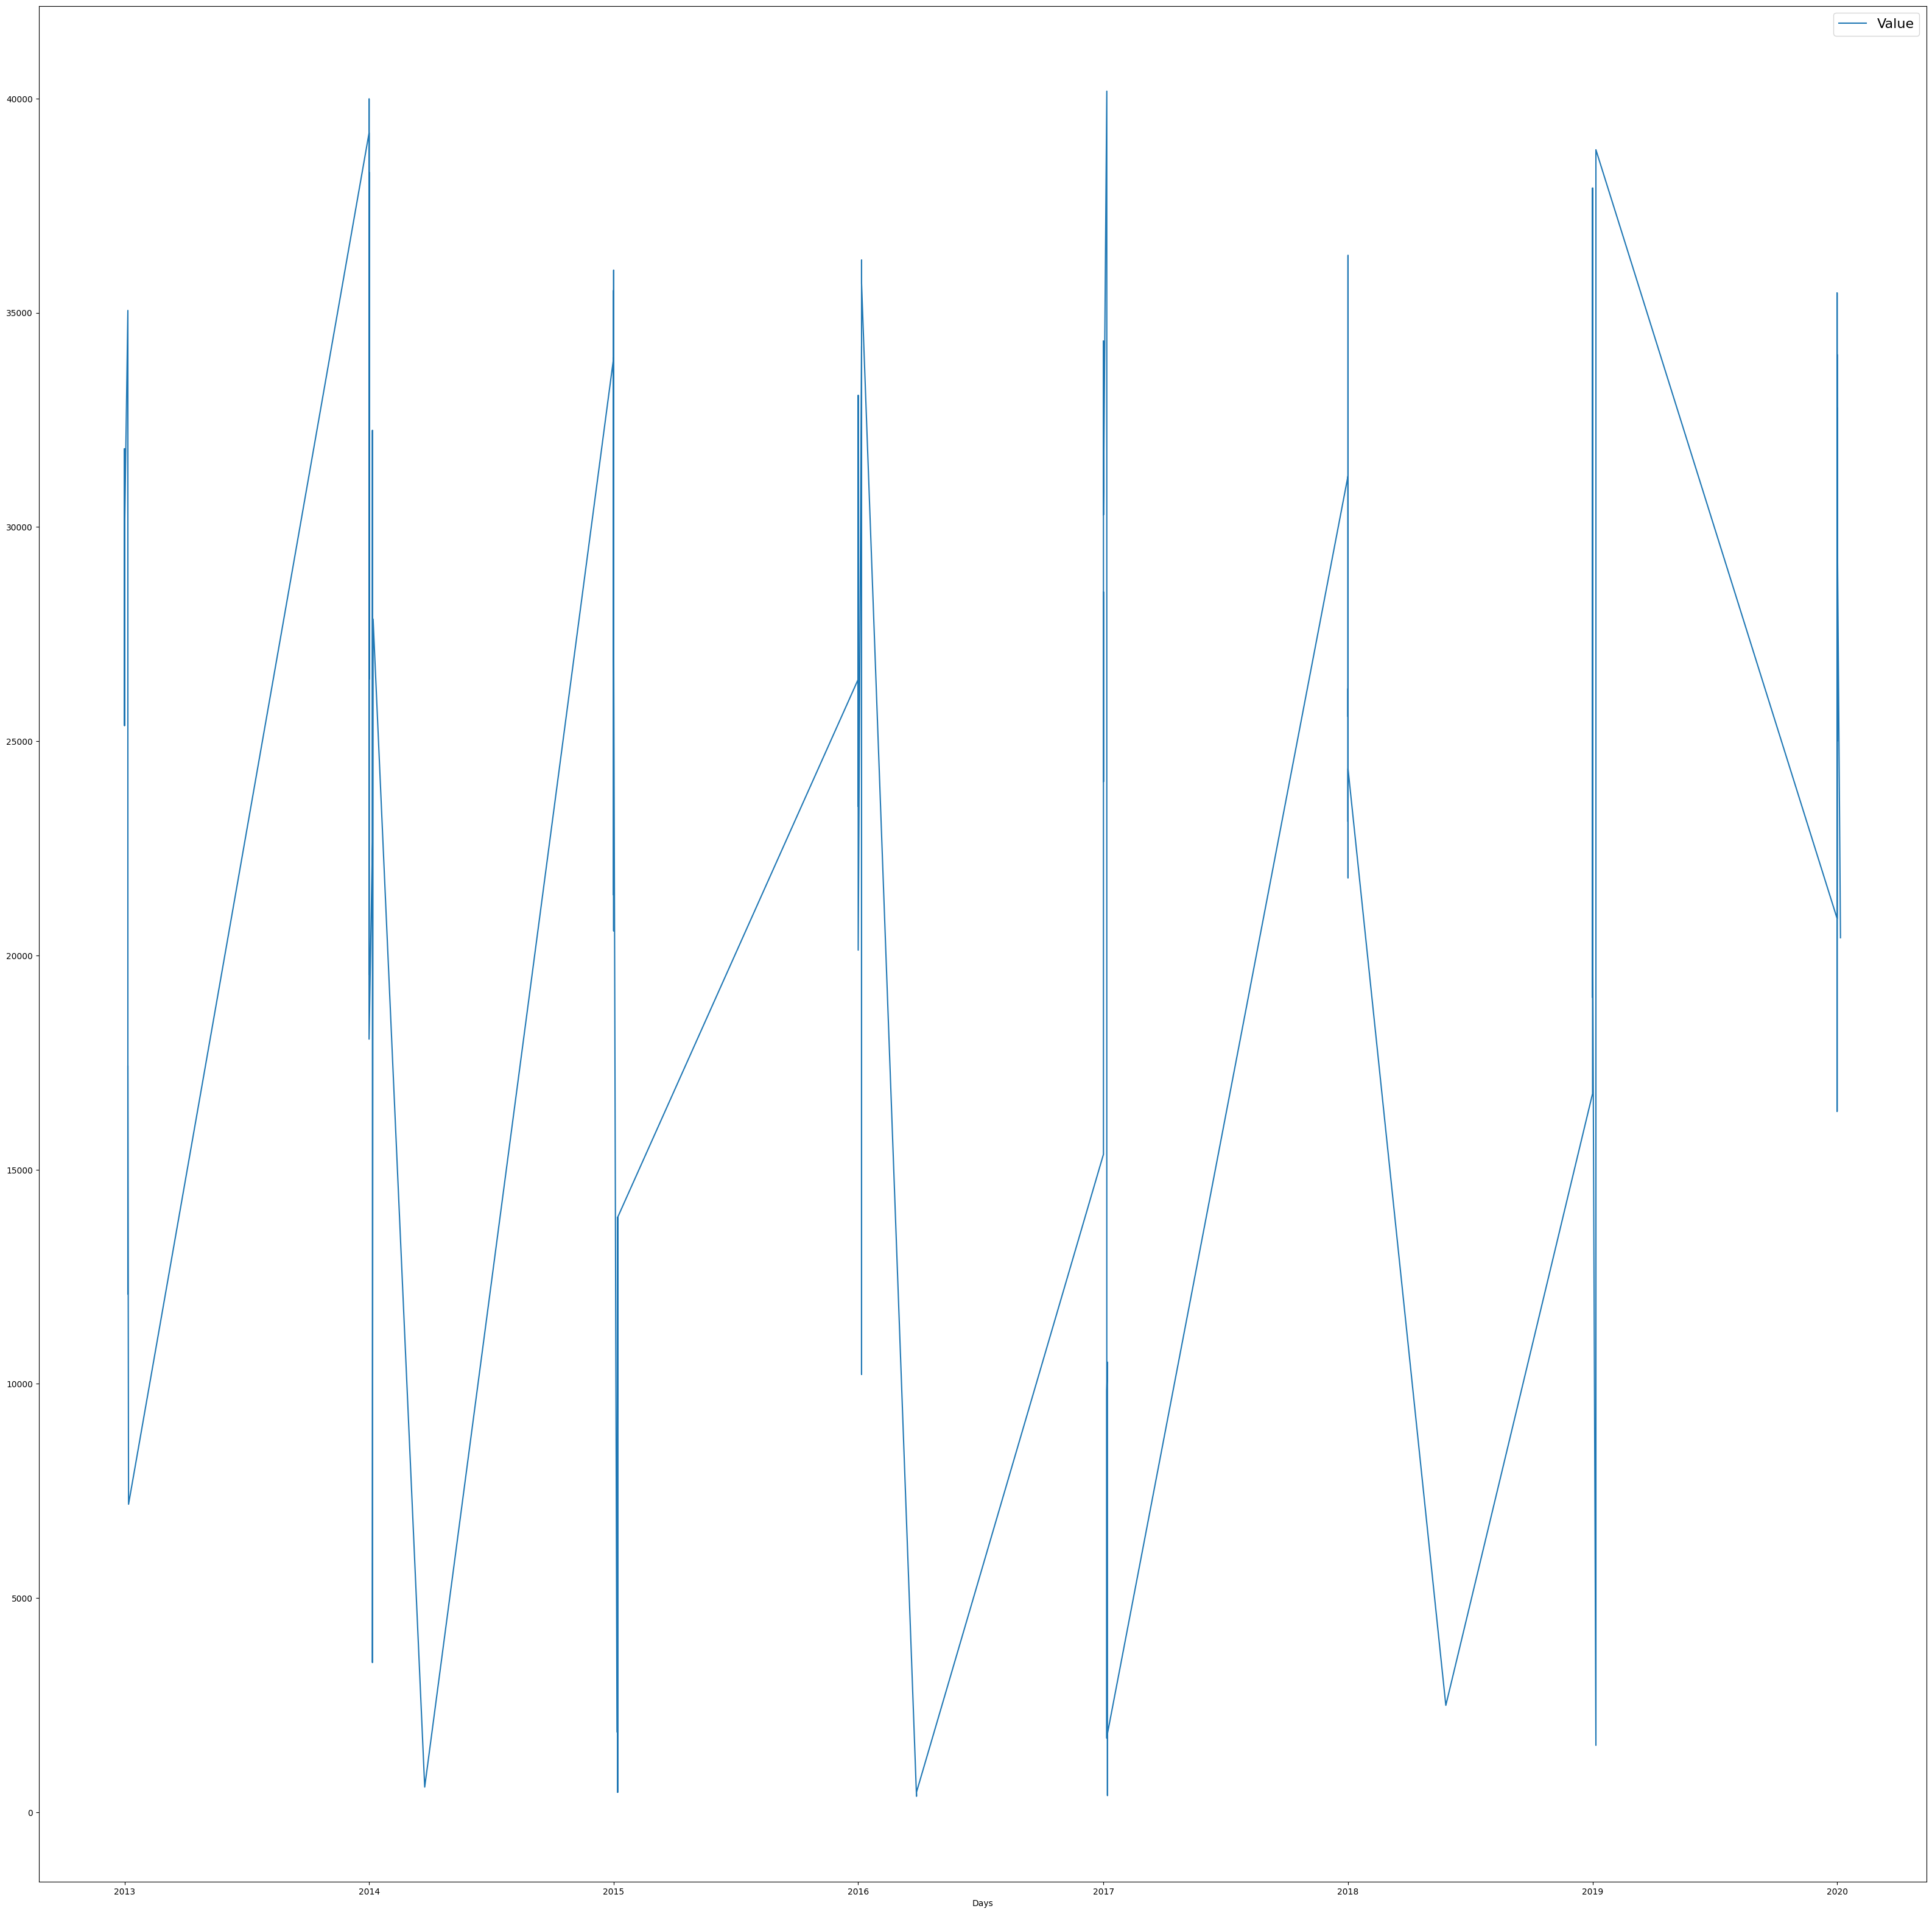

In [40]:
plt.rcParams["figure.figsize"] = (40, 40)

plt.plot(time_series_2["Selling_Price"], label="Value")
plt.xlabel('Days')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

In [41]:
time_series_2.tail(50)

,Selling_Price
Date,
2017-01-01,34342.0
2017-01-01,30286.0
2017-01-01,30468.0
2017-01-06,40173.0
2017-01-06,1732.0
2017-01-06,9842.0
2017-01-07,10507.0
2017-01-07,393.0
2017-01-07,1838.0


In [44]:
df_frequency_annual = time_series_2.resample('A').sum()


In [45]:
df_frequency_annual.head(50)

,Selling_Price
Date,
2013-12-31,286940.0
2014-12-31,446018.0
2015-12-31,349968.0
2016-12-31,372045.0
2017-12-31,309035.0
2018-12-31,191128.0
2019-12-31,358255.0
2020-12-31,510590.0


In [46]:
zero_count = (df_frequency_annual['Selling_Price'] == 0).sum()


In [47]:
len(df_frequency_annual)

8

In [48]:
zero_count

0

In [49]:
df_frequency_annual

,Selling_Price
Date,
2013-12-31,286940.0
2014-12-31,446018.0
2015-12-31,349968.0
2016-12-31,372045.0
2017-12-31,309035.0
2018-12-31,191128.0
2019-12-31,358255.0
2020-12-31,510590.0


In [47]:
mask = (df_frequency_annual == 0).sum(axis=1) == 1


In [48]:
df_frequency_annual[mask] = df_frequency_annual[mask].replace(0, np.nan)


In [64]:
average= np.average(time_series_2["Selling_Price"]).round(2)

In [50]:
df_frequency_annual

,Selling_Price
Date,
2012-12-31,8603.0
2013-01-31,7130.0
2013-02-28,NaN
2013-03-31,896.0
2013-04-30,2606.0
...,...
2020-02-29,NaN
2020-03-31,6597.0
2020-04-30,NaN


In [65]:
df_frequency_annual= df_frequency_annual.fillna(value=average)

In [66]:
df_frequency_annual.head(15)

,Selling_Price
Date,
2012-12-31,8603.00
2013-01-31,7130.00
2013-02-28,636.91
2013-03-31,896.00
2013-04-30,2606.00
2013-05-31,476.00
2013-06-30,2709.00
2013-07-31,636.91
2013-08-31,636.91


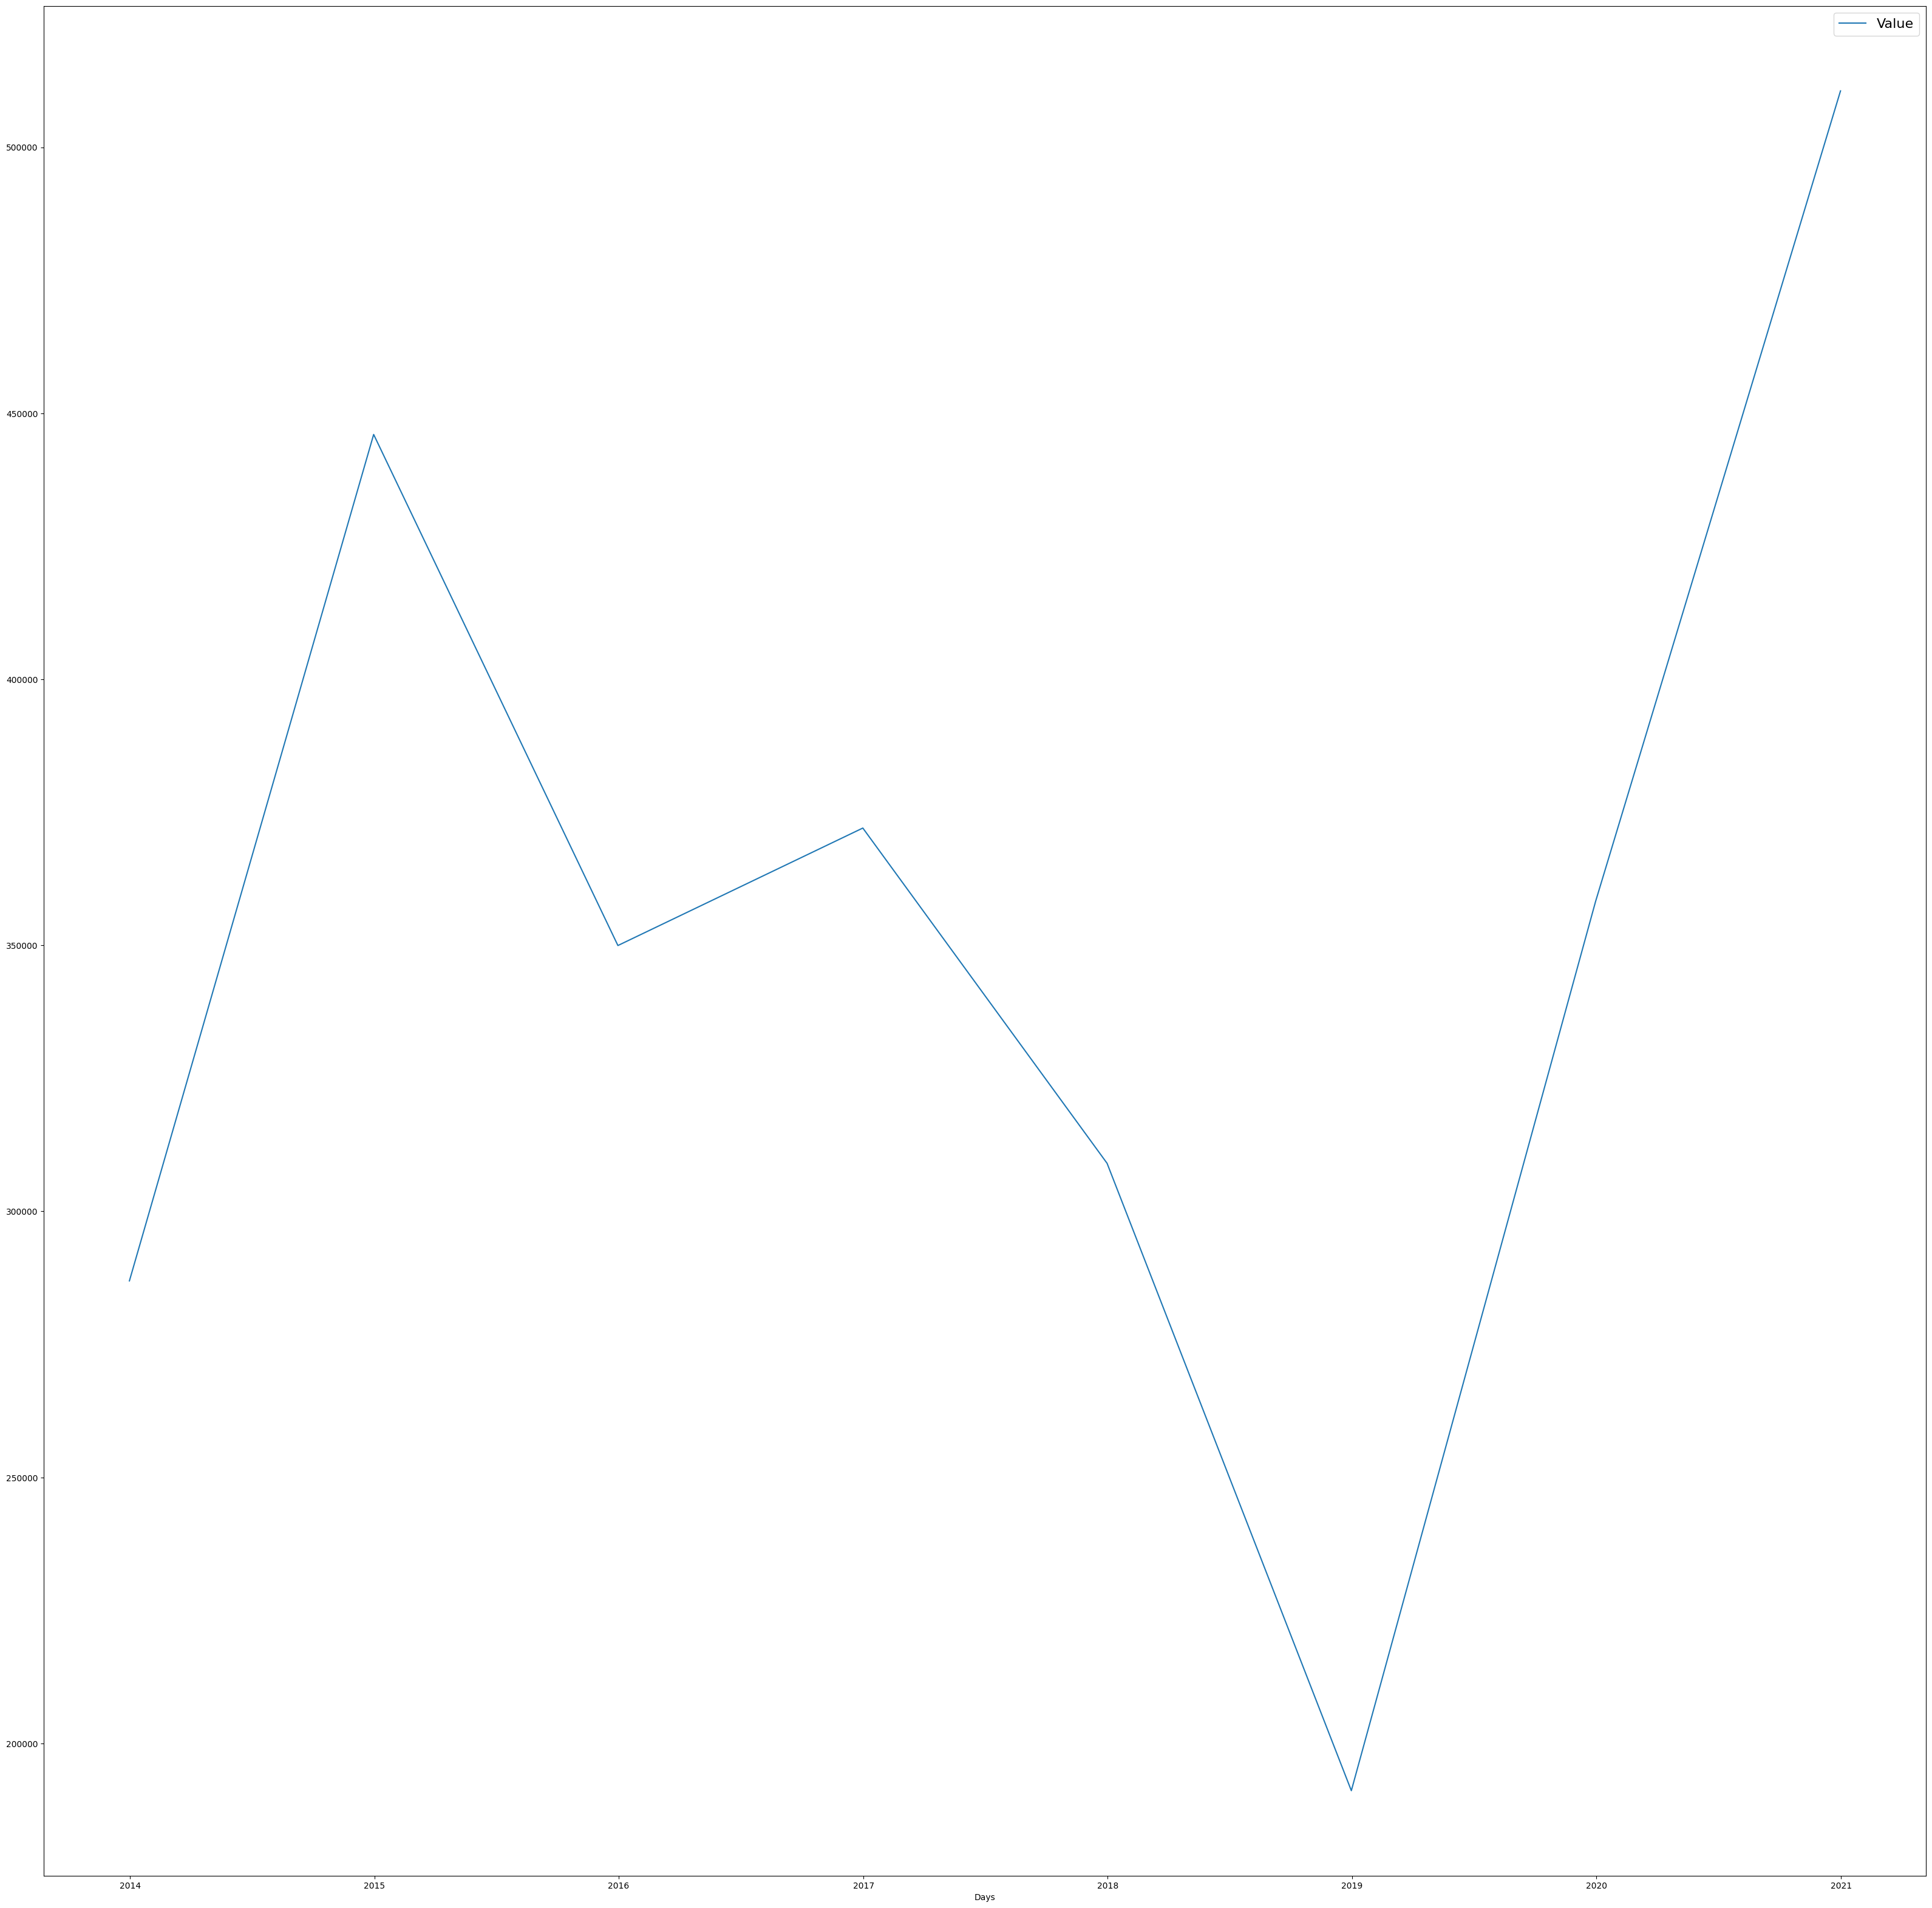

In [50]:
plt.rcParams["figure.figsize"] = (40, 40)

plt.plot(df_frequency_annual["Selling_Price"], label="Value")
plt.xlabel('Days')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

- What we just saw was a common mistake at the time of working with Time Series
- There are different things that we have to consider like: The price of Subcategories and the scale, let´s re do it but now selection a specific group


You are given the following dataset. As you can probably already infer, it is from an e-commerce platform. Your task is to try and come up with a solid ML model that can predict the price of the good given those 7 columns. Please use the already given train test split.

### EDA and preparing final dataset

Please don't spend a lot of time with the EDA, just a few graphs to know what to do with the variables and move on. Please explain your reasoning for every step whenever you can.

Hint: How is the selling price distributed?

### Fitting model

Please fit the best model you can to your adapted dataset. Fit a model of your choice.

Please explain your reasoning for every step whenever you can.